# Diagnosing the Model

Evaluate the accuracy and health of the logistic regression model by creating a confusion matrix and classification report to describe the performance of the models.

In [3]:
from pathlib import Path
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pandas as pd

### Create, train, and execute the LR model

In [5]:
# Prep the data
data = Path('../Resources/diabetes.csv')
df = pd.read_csv(data)

y = df["Outcome"]
X = df.drop(columns="Outcome")

# Split data into test and train subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

# Create and train LR model
classifier = LogisticRegression(random_state=1)

classifier.fit(X_train, y_train)

# Make LR predictions
predictions = classifier.predict(X_test)
results = pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)
results.head()

/opt/anaconda3/envs/dev/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


,Prediction,Actual
0,0,0
1,1,1
2,0,0
3,1,1
4,0,0


# Confusion Matrix

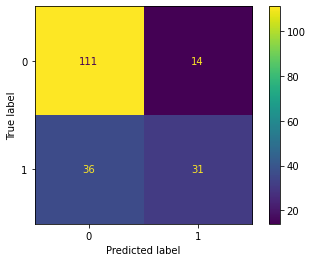

In [3]:
# Create confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm_plot = confusion_matrix(y_test, predictions)
cm_plot
ConfusionMatrixDisplay(cm_plot).plot()

# Classification Report

In [4]:
# Create the classification report
target_names = ["No Diabetes", "Diabetes"]
print(classification_report(y_test, predictions, target_names=target_names))

              precision    recall  f1-score   support

 No Diabetes       0.76      0.89      0.82       125
    Diabetes       0.69      0.46      0.55        67

    accuracy                           0.74       192
   macro avg       0.72      0.68      0.68       192
weighted avg       0.73      0.74      0.72       192

